## [Aproksymacja. Mnożenie macierzy](https://github.com/kzajac/Mownit2018/blob/master/Mownit_Lab3.ipynb)

In [1]:
using DataFrames
using Statistics
using CSV
using Plots
using Polynomials

function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

### Zadanie 1.
Uruchomić 
   - naive_multiplication(A,B), 
   - better_multiplication(A,B) 
   - mnożenie BLAS w Julii (A*B) 

dla coraz większych macierzy i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie.

In [3]:
types = []; sizes = []; times = [];
msizes = [1000, 1292, 1668, 2154, 2500];

_Aby uniknąć długich czasów obliczeń, repozytorium zostało wyposażone w przykładowe wyniki. Można je załadować kilka komórek niżej, odkomentowując odpowiednie linijki kodu._

In [5]:
for i=1:5
    for j=1:5
        A=rand(msizes[i], msizes[i])
        B=rand(msizes[i], msizes[i])
        push!(types, "j-naive")
        push!(sizes, msizes[i])
        push!(times, @elapsed naive_multiplication(A,B))
    end
end
j_tests_raw = [types,sizes,times];

In [8]:
for i=1:5
    for j=1:5
        A=rand(msizes[i], msizes[i])
        B=rand(msizes[i], msizes[i])
        push!(types, "j-better")
        push!(sizes, msizes[i])
        push!(times, @elapsed better_multiplication(A,B))
    end
end
j_tests_raw = [types,sizes,times];

In [10]:
for i=1:5
    for j=1:5
        A=rand(msizes[i], msizes[i])
        B=rand(msizes[i], msizes[i])
        push!(types, "j-blas")
        push!(sizes, msizes[i])
        push!(times, @elapsed (A*B))
    end
end
j_tests_raw = [types,sizes,times];

In [20]:
j_tests_df = DataFrame(j_tests_raw, [:Types, :Sizes, :Times])

,Types,Sizes,Times
,Any,Any,Any
1,j-naive,1000,11.2259
2,j-naive,1000,11.1195
3,j-naive,1000,11.1042
4,j-naive,1000,11.1059
5,j-naive,1000,11.1135
6,j-naive,1000,24.5386
7,j-naive,1292,24.4589
8,j-naive,1292,24.4138
9,j-naive,1292,24.4667


In [12]:
# Wczytanie przykładowych danych z pliku
# j_tests_df = CSV.read("backup.csv")

In [13]:
# Agregujemy wyniki
j_tests_grouped = by(j_tests_df, [:Types],
    df -> by(df, [:Sizes], 
        df2 -> DataFrame(
            Mean = mean(df2[:Times]),
            StdDeviation = sqrt(var(df2[:Times])))))

,Types,Sizes,Mean,StdDeviation
,String⍰,Int64⍰,Float64,Float64
1,j-naive,1000,11.1338,0.0518393
2,j-naive,1292,24.4603,0.0492511
3,j-naive,1668,54.6687,0.570899
4,j-naive,2154,125.997,0.972514
5,j-naive,2500,212.505,0.986304
6,j-better,1000,2.63176,0.0314509
7,j-better,1292,5.64402,0.0355937
8,j-better,1668,12.1044,0.00757114
9,j-better,2154,26.0423,0.0119876


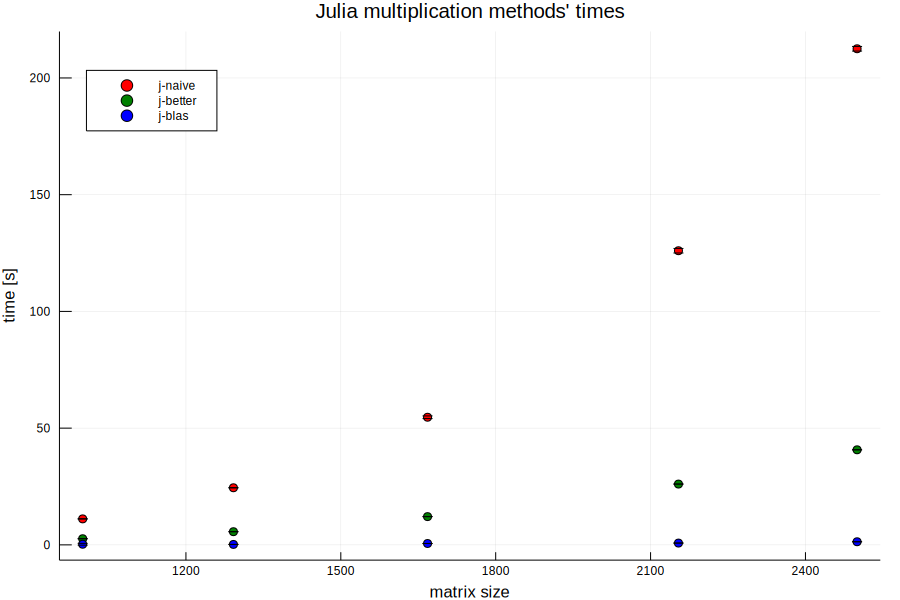

In [14]:
function j_plot_()
    scatter!(
        j_tests_grouped[j_tests_grouped[:Types].== "j-naive", :][:Sizes],
        j_tests_grouped[j_tests_grouped[:Types].== "j-naive", :][:Mean],
        yerr = j_tests_grouped[j_tests_grouped[:Types].== "j-naive", :][:StdDeviation],
        label = "j-naive",
        color = :red
    )
    scatter!(
        j_tests_grouped[j_tests_grouped[:Types].== "j-better", :][:Sizes],
        j_tests_grouped[j_tests_grouped[:Types].== "j-better", :][:Mean],
        yerr = j_tests_grouped[j_tests_grouped[:Types].== "j-better", :][:StdDeviation],
        label = "j-better",
        color = :green
    )
    scatter!(
        j_tests_grouped[j_tests_grouped[:Types].== "j-blas", :][:Sizes],
        j_tests_grouped[j_tests_grouped[:Types].== "j-blas", :][:Mean],
        yerr = j_tests_grouped[j_tests_grouped[:Types].== "j-blas", :][:StdDeviation],
        label = "j-blas",
        color = :blue
    )
end

scatter(title = "Julia multiplication methods' times",
        xlabel = "matrix size",
        ylabel = "time [s]",
        size = (900,600),
        legend = :topleft
    )
j_plot_()

### Zadanie 2.
Napisać w języku C:
 - naiwną metodę mnożenia macierzy (wersja 1) 
 - ulepszoną za pomocą zamiany pętli metodę mnożenia macierzy (wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
 - skorzystać z  możliwości BLAS dostępnego w GSL(wersja 3). 
    
Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1.(osobno niż p.1).

**Wprowadź _make tests_ w konsoli, aby uruchomić mnożenie i zmierzyć czasy.**

_Repozytorium zawiera przykładowe wyniki powyższych pomiarów._

In [15]:
# Wczytuję dane i agreguję je
input=CSV.read("results.csv")
c_tests_grouped=by(input, [:Types],
    df -> by(df, [:Sizes], 
        df2 -> DataFrame(
            Mean = mean(df2[:Times]),
            StdDeviation = sqrt(var(df2[:Times])))))

,Types,Sizes,Mean,StdDeviation
,String⍰,Int64⍰,Float64,Float64
1,c-naive,1000,14.5042,0.0201296
2,c-naive,1292,34.7582,0.040351
3,c-naive,1668,75.2476,0.334429
4,c-naive,2154,210.266,1.6535
5,c-naive,2500,281.101,1.34946
6,c-better,1000,8.4152,0.0127554
7,c-better,1292,18.1144,0.0175157
8,c-better,1668,38.9368,0.0233388
9,c-better,2154,83.3842,0.0389577


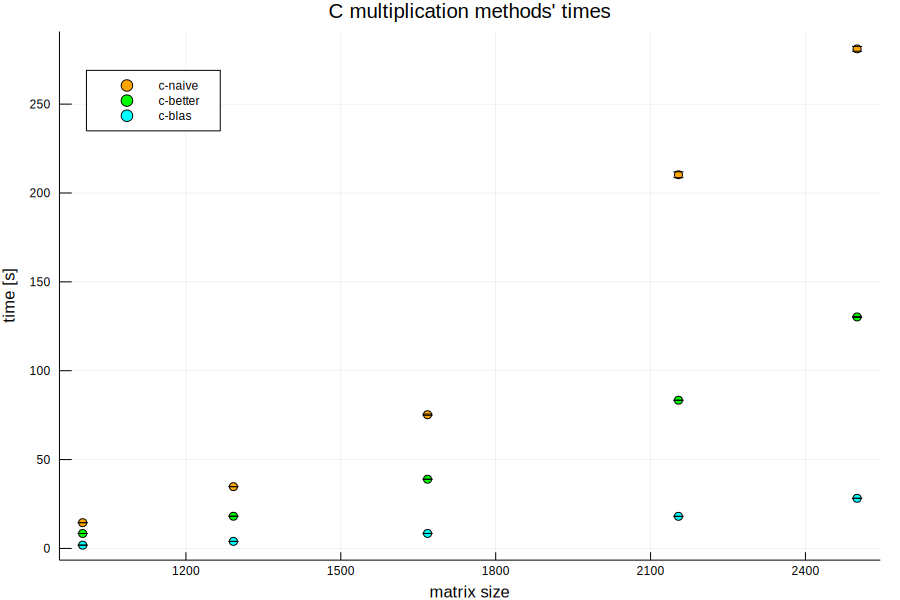

In [16]:
function c_plot_()
    scatter!(
        c_tests_grouped[c_tests_grouped[:Types].== "c-naive", :][:Sizes],
        c_tests_grouped[c_tests_grouped[:Types].== "c-naive", :][:Mean],
        label = "c-naive",
        color = :orange,
        yerr = c_tests_grouped[c_tests_grouped[:Types].== "c-naive", :][:StdDeviation]
    )
    scatter!(
        c_tests_grouped[c_tests_grouped[:Types].== "c-better", :][:Sizes],
        c_tests_grouped[c_tests_grouped[:Types].== "c-better", :][:Mean],
        yerr = c_tests_grouped[c_tests_grouped[:Types].== "c-better", :][:StdDeviation],
        label = "c-better",
        color = :lime
    )
    scatter!(
        c_tests_grouped[c_tests_grouped[:Types].== "c-blas", :][:Sizes],
        c_tests_grouped[c_tests_grouped[:Types].== "c-blas", :][:Mean],
        yerr = c_tests_grouped[c_tests_grouped[:Types].== "c-blas", :][:StdDeviation],
        label = "c-blas",
        color = :cyan
    )
end

scatter(title = "C multiplication methods' times",
        xlabel = "matrix size",
        ylabel = "time [s]",
        size = (900,600),
        legend = :topleft
    )
c_plot_()

### Zadanie 3.
Użyć funkcji polyfit  z pakietu  Polynomials   do znalezienia odpowiednich wielomianow, ktore najlepiej pasują do zależności czasowych kazdego z algorytmow. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianow do wczesniejszych  wykresów.


In [19]:
j_naive_poly = polyfit(
    j_tests_grouped[j_tests_grouped[:Types].== "j-naive", :][:Sizes],
    j_tests_grouped[j_tests_grouped[:Types].== "j-naive", :][:Mean], 3
)
j_better_poly = polyfit(
    j_tests_grouped[j_tests_grouped[:Types].== "j-better", :][:Sizes],
    j_tests_grouped[j_tests_grouped[:Types].== "j-better", :][:Mean], 3
)
j_blas_poly = polyfit(
    j_tests_grouped[j_tests_grouped[:Types].== "j-blas", :][:Sizes],
    j_tests_grouped[j_tests_grouped[:Types].== "j-blas", :][:Mean], 3
)
c_naive_poly = polyfit(
    c_tests_grouped[c_tests_grouped[:Types].== "c-naive", :][:Sizes],
    c_tests_grouped[c_tests_grouped[:Types].== "c-naive", :][:Mean], 3
)
c_better_poly = polyfit(
    c_tests_grouped[c_tests_grouped[:Types].== "c-better", :][:Sizes],
    c_tests_grouped[c_tests_grouped[:Types].== "c-better", :][:Mean], 3
)
c_blas_poly = polyfit(
    c_tests_grouped[c_tests_grouped[:Types].== "c-blas", :][:Sizes],
    c_tests_grouped[c_tests_grouped[:Types].== "c-blas", :][:Mean], 3
)
r = 1000:50:2500;

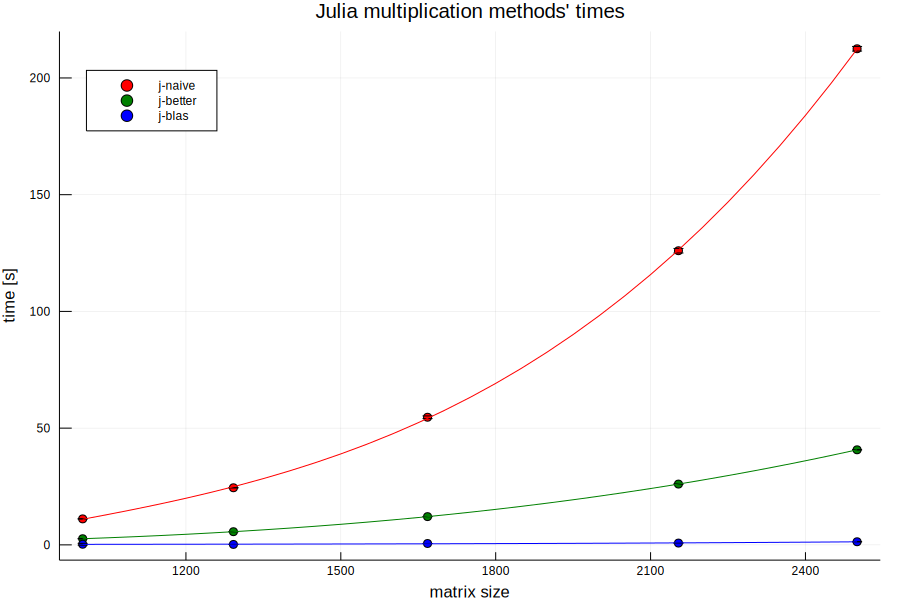

In [20]:
scatter(title = "Julia multiplication methods' times",
        xlabel = "matrix size",
        ylabel = "time [s]",
        size = (900,600),
        legend = :topleft
    )
j_plot_()
plot!(r, polyval(j_naive_poly, r), color=:red, label="")
plot!(r, polyval(j_better_poly, r), color=:green, label="")
plot!(r, polyval(j_blas_poly, r), color=:blue, label="")

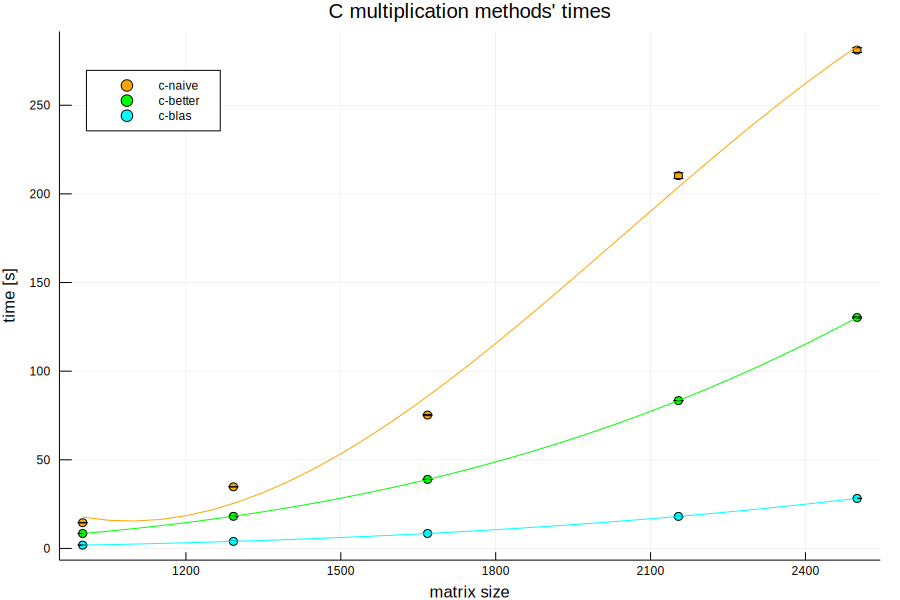

In [21]:
scatter(title = "C multiplication methods' times",
        xlabel = "matrix size",
        ylabel = "time [s]",
        size = (900,600),
        legend = :topleft
    )
c_plot_()
plot!(r, polyval(c_naive_poly, r), color=:orange, label="")
plot!(r, polyval(c_better_poly, r), color=:lime, label="")
plot!(r, polyval(c_blas_poly, r), color=:cyan, label="")

### Zadanie 4.
Przedstawić wyniki dla języka Julia i C na wspólnym wykresie. Jaka metoda jest najszybsza? 


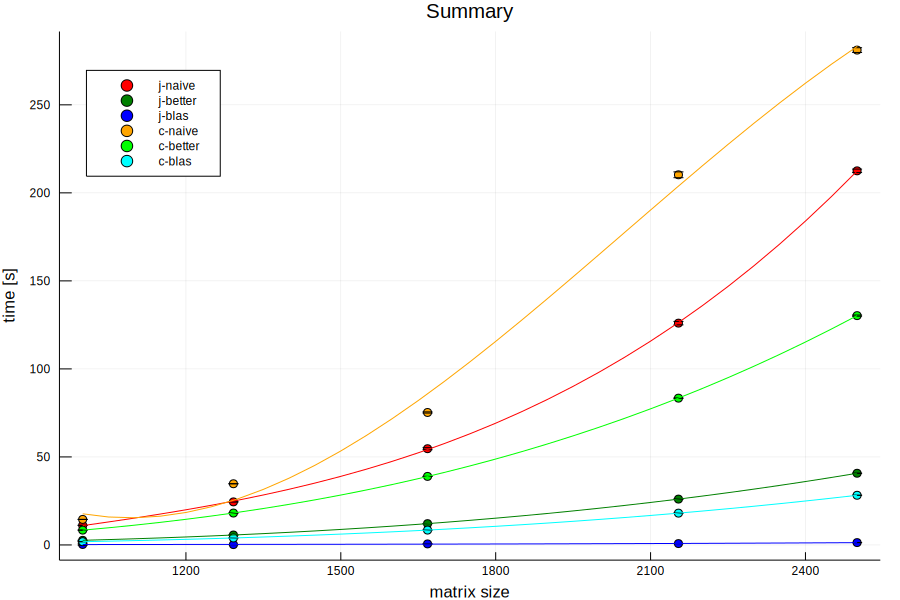

In [22]:
scatter(title = "Summary",
        xlabel = "matrix size",
        ylabel = "time [s]",
        size = (900,600),
        legend = :topleft
    )
j_plot_()
c_plot_()
plot!(r, polyval(j_naive_poly, r), color=:red, label="")
plot!(r, polyval(j_better_poly, r), color=:green, label="")
plot!(r, polyval(j_blas_poly, r), color=:blue, label="")
plot!(r, polyval(c_naive_poly, r), color=:orange, label="")
plot!(r, polyval(c_better_poly, r), color=:lime, label="")
plot!(r, polyval(c_blas_poly, r), color=:cyan, label="")